In [160]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Data understanding, preparation and EDA:

In [161]:
#Read the Data
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [162]:
df.shape

(730, 16)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [164]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Cleaning:

In [165]:
# Remove Duplicates If Any.
df.drop_duplicates(inplace=True)

In [166]:
# Checking if there is any missing value in any of the column in our dataset and found none of the attributes has
# any missing value.
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [167]:
# Removing Columns which are not required for further analysis
# 1.instant - It's sequence generated column(index) with unique values. We don't need that.
# 2.dteday - year and month are already present as separate attribute in the dataset. So we can drop this as well.
# 3.casual & registered - These 2 columns represent 2 different types of customer booking and the "cnt" column contains
#   the sum of "casual" and "registered" booking. As we are inerested in "demand for shared bikes with the available 
#   independent variables" and not by their individual categories so we can drop both of them as well.  

print(len(df[((df['casual']+df['registered'])!=df['cnt'])]))

0


In [168]:
# Dropping "instant","dteday","casual","registered" from the dataset
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
df.shape

(730, 12)

### Handling Categorical Variables:
#### Here we are not dropping any dummy variables right way. We will check them later during the feature selection phase and drop them if required.

In [169]:
#Converting season
df['season'].replace((1,2,3,4), ('spring','summer','fall','winter'),inplace=True)
df['season'].value_counts(normalize=True)

fall      0.257534
summer    0.252055
spring    0.246575
winter    0.243836
Name: season, dtype: float64

In [170]:
#Converting mnth
df['mnth'].replace((1,2,3,4,5,6,7,8,9,10,11,12),('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),inplace=True)
df['mnth'].value_counts(normalize=True)

jan    0.084932
mar    0.084932
may    0.084932
jul    0.084932
aug    0.084932
oct    0.084932
dec    0.084932
apr    0.082192
jun    0.082192
sep    0.082192
nov    0.082192
feb    0.076712
Name: mnth, dtype: float64

In [171]:
#Converting weathersit
df['weathersit'].replace((1,2,3,4), ('clear','cloudy_misty','light_rain_snow','heavy_rain_snow'),inplace=True)
df['weathersit'].value_counts(normalize=True)

clear              0.634247
cloudy_misty       0.336986
light_rain_snow    0.028767
Name: weathersit, dtype: float64

In [172]:
#Converting weekday
# As per the data,for dteday=01-01-2018,weekday is showing 6. Now 1st Jan 2018 is Monday so we assign
# 0 to Monday,1 to Tuesday and so on.
df['weekday'].replace((6,0,1,2,3,4,5), ('monday','tuesday','wednesday','thursday','friday','saturday','sunday'),inplace=True)
df['weekday'].value_counts(normalize=True)

monday       0.143836
tuesday      0.143836
wednesday    0.143836
thursday     0.142466
saturday     0.142466
sunday       0.142466
friday       0.141096
Name: weekday, dtype: float64

### Categorical Variable Analysis:

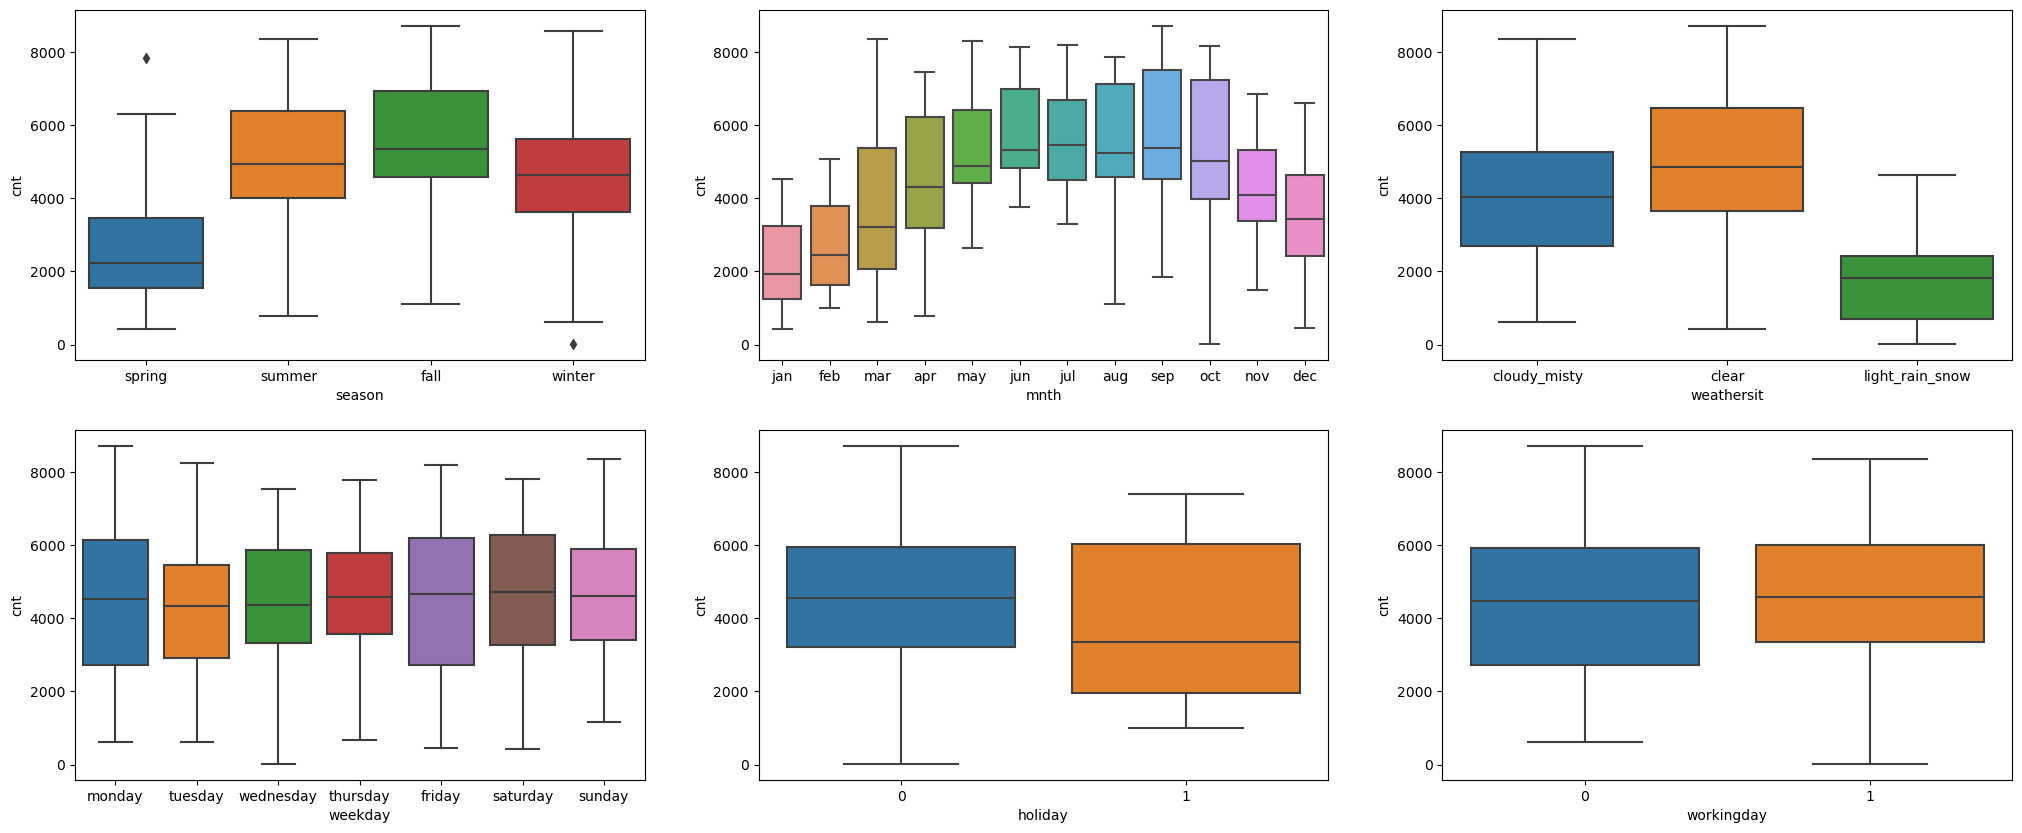

In [173]:
# Visualizing Categorical Variables
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

<AxesSubplot:xlabel='season', ylabel='cnt'>

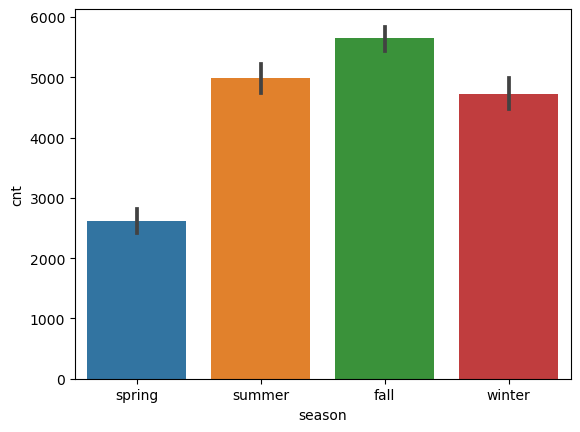

In [174]:
# season:
# Most of the bike booking were happening in Fall followed by Summer & Winter.
sns.barplot(x='season',y='cnt',data=df)

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

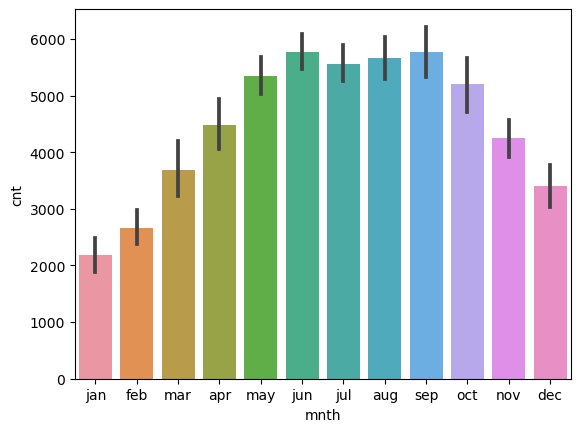

In [175]:
# mnth:
# Bike booking were high during may to september.
sns.barplot(x='mnth',y='cnt',data=df)

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

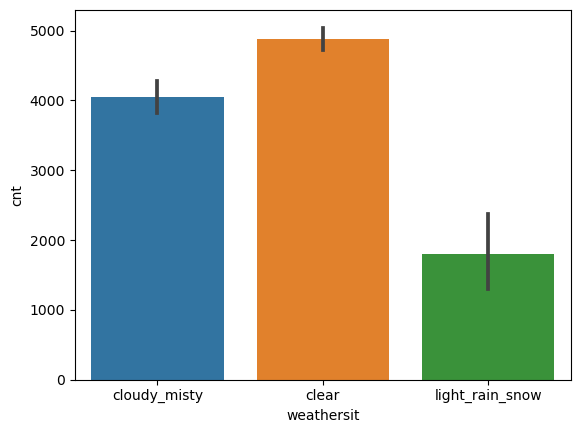

In [176]:
# weathersit
# The current data frame does not have any data where the weather is Heavy_RainSnow but from the following
# it is clearly evident that most of the bike rentals are happened when weather is clear or cloudy/misty or
# in other words when there is no rain or snow.
sns.barplot(x='weathersit',y='cnt',data=df)

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

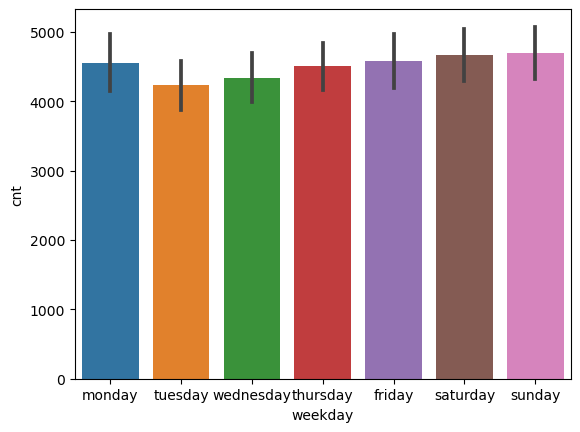

In [177]:
# weekday:
# weekday variable shows the very close trend and this variable can have some or no influence on the predictor.
sns.barplot(x='weekday',y='cnt',data=df)

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

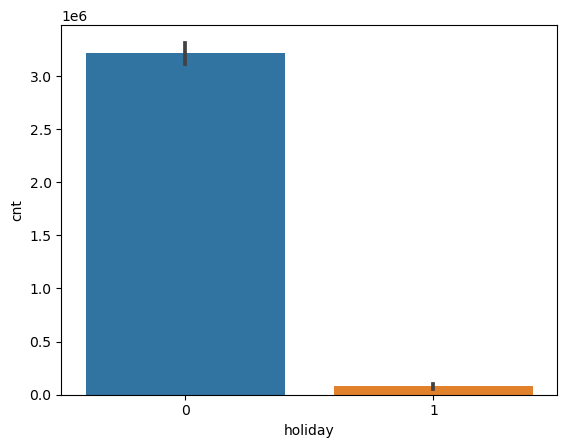

In [178]:
# holiday:
# bike rentals are very higher during non-holiday time.
sns.barplot(x='holiday',y='cnt',data=df,estimator=sum)

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

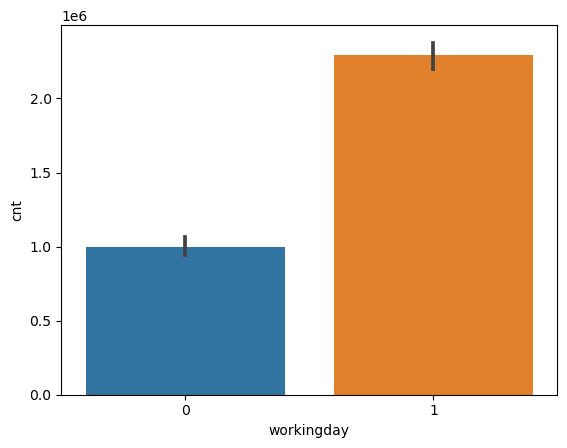

In [179]:
# workingday:
# bike rentals are much more higher on the workingdays.
sns.barplot(x='workingday',y='cnt',data=df,estimator=sum)

### Numerical Variable Analysis:

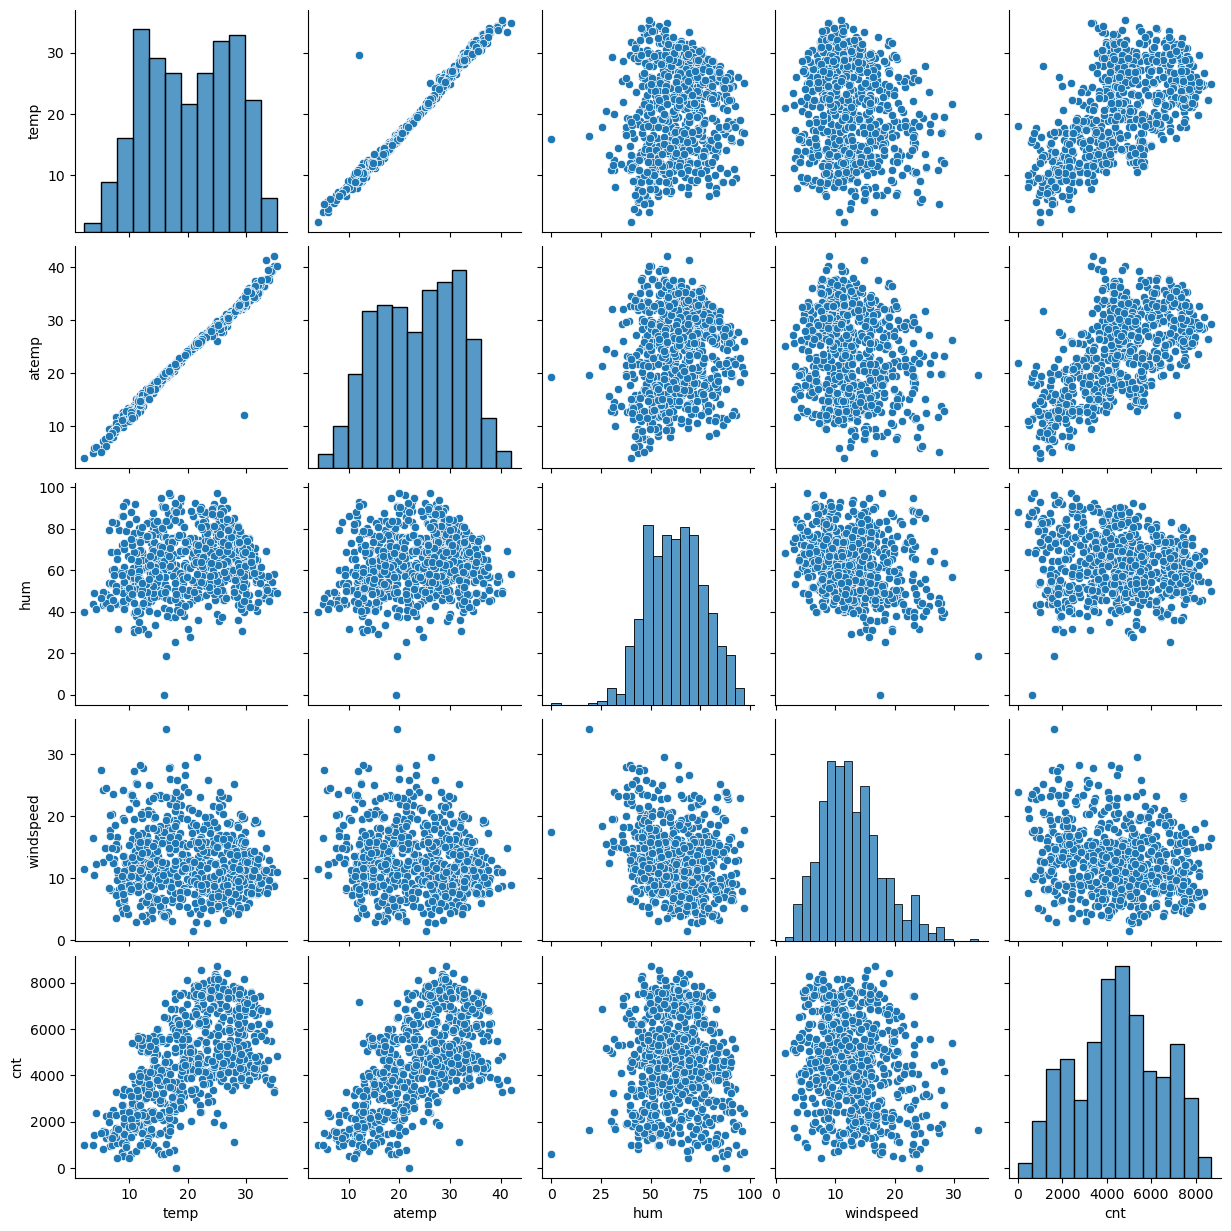

In [180]:
# Visualizing Numerical Variables
# temp/atemp is very highly correlated with "cnt"
df_num = df[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(df_num)
plt.show()

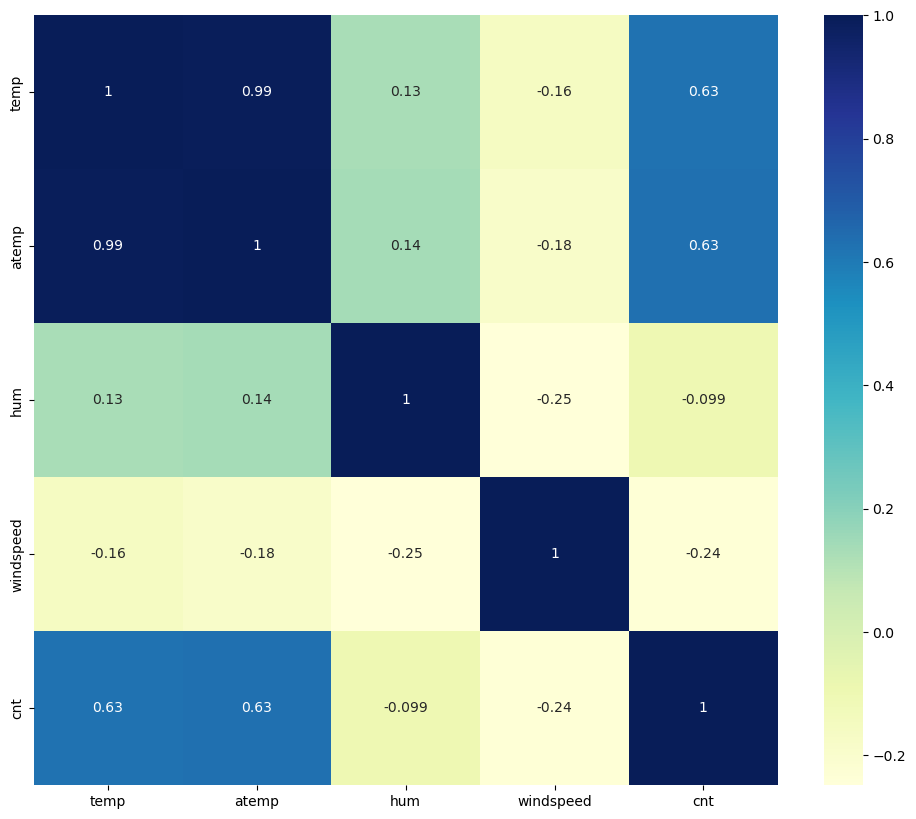

In [181]:
# Visualizing correlations between numeric features.
# temp and atemp are highly correlated with each other. We will check them later during the feature selection phase 
# and drop any one of them if required.
plt.figure(figsize= (12,10))
sns.heatmap(df_num.corr(),annot=True,cmap='YlGnBu')
plt.show()

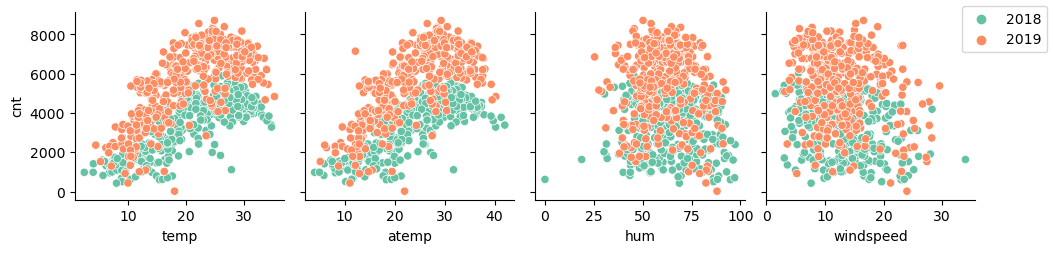

In [182]:
# Checking the impact of year against the numerical variable : 
# All the parameters have increased values in 2019 compared to 2018. Thus, year may become a key paratemeter in the model
ax = sns.pairplot(x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=df, hue='yr', palette='Set2')
handles = ax._legend_data.values()
labels = ['2018','2019']
ax.fig.legend(handles=handles, labels=labels, loc='upper right', ncol=1)
ax._legend.remove()
plt.show()

### Dummy Variable Creation:

In [183]:
# For "weathersit"
weather = pd.get_dummies(df['weathersit'],drop_first=True)
weather.head()

,cloudy_misty,light_rain_snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [184]:
# For "mnth"
month = pd.get_dummies(df['mnth'],drop_first=True)
month.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [185]:
# For "weekday"
weekday = pd.get_dummies(df['weekday'],drop_first=True)
weekday.head()

,monday,saturday,sunday,thursday,tuesday,wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [186]:
# For "season"
season = pd.get_dummies(df['season'],drop_first=True)
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


#### Merging the Dataframes:

In [187]:
# Creating a new dataframe called bike_df where weather,season,month and weekday dataframe is being added 
# with the actual dataframe
bike_df = pd.concat([df,weather,season,month,weekday], axis = 1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,may,nov,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday
0,spring,0,jan,0,monday,0,cloudy_misty,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,0,0
1,spring,0,jan,0,tuesday,0,cloudy_misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,jan,0,wednesday,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,jan,0,thursday,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,jan,0,friday,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [188]:
bike_df.shape

(730, 34)

In [189]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           730 non-null    object 
 1   yr               730 non-null    int64  
 2   mnth             730 non-null    object 
 3   holiday          730 non-null    int64  
 4   weekday          730 non-null    object 
 5   workingday       730 non-null    int64  
 6   weathersit       730 non-null    object 
 7   temp             730 non-null    float64
 8   atemp            730 non-null    float64
 9   hum              730 non-null    float64
 10  windspeed        730 non-null    float64
 11  cnt              730 non-null    int64  
 12  cloudy_misty     730 non-null    uint8  
 13  light_rain_snow  730 non-null    uint8  
 14  spring           730 non-null    uint8  
 15  summer           730 non-null    uint8  
 16  winter           730 non-null    uint8  
 17  aug             

#### Removing unnecessary columns:

In [190]:
# deleting the original categorical columns weathersit,season,mnth and weekday as the corresponding values are already 
# taken care by the dummy variables
bike_df.drop(['season','mnth','weathersit','weekday','atemp'],axis=1,inplace=True)
bike_df.shape

(730, 29)

In [191]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   hum              730 non-null    float64
 5   windspeed        730 non-null    float64
 6   cnt              730 non-null    int64  
 7   cloudy_misty     730 non-null    uint8  
 8   light_rain_snow  730 non-null    uint8  
 9   spring           730 non-null    uint8  
 10  summer           730 non-null    uint8  
 11  winter           730 non-null    uint8  
 12  aug              730 non-null    uint8  
 13  dec              730 non-null    uint8  
 14  feb              730 non-null    uint8  
 15  jan              730 non-null    uint8  
 16  jul              730 non-null    uint8  
 17  jun             

#### Splitting the data into Train & Test Dataset:

In [192]:
#Spliting into train test
#np.random.seed(0)
bike_df_train,bike_df_test = train_test_split(bike_df,train_size=0.7,random_state=100)
print(bike_df_train.shape)
print(bike_df_test.shape)

(510, 29)
(220, 29)


#### Rescalling bike_df_train dataframe:

In [193]:
#Rescaling the Features
#1.Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric vars
num_vars = ['temp','hum','windspeed','cnt']

#2.Fit on Data:
# scaler.fit
bike_df_train[num_vars] = scaler.fit_transform(bike_df_train[num_vars])
bike_df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,cloudy_misty,light_rain_snow,spring,...,may,nov,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,1,...,0,0,0,0,1,0,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,0,1,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,1,0,0,...,0,0,0,0,1,0,0,0,0,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,1,0,0,...,0,0,0,0,0,0,1,0,0,0


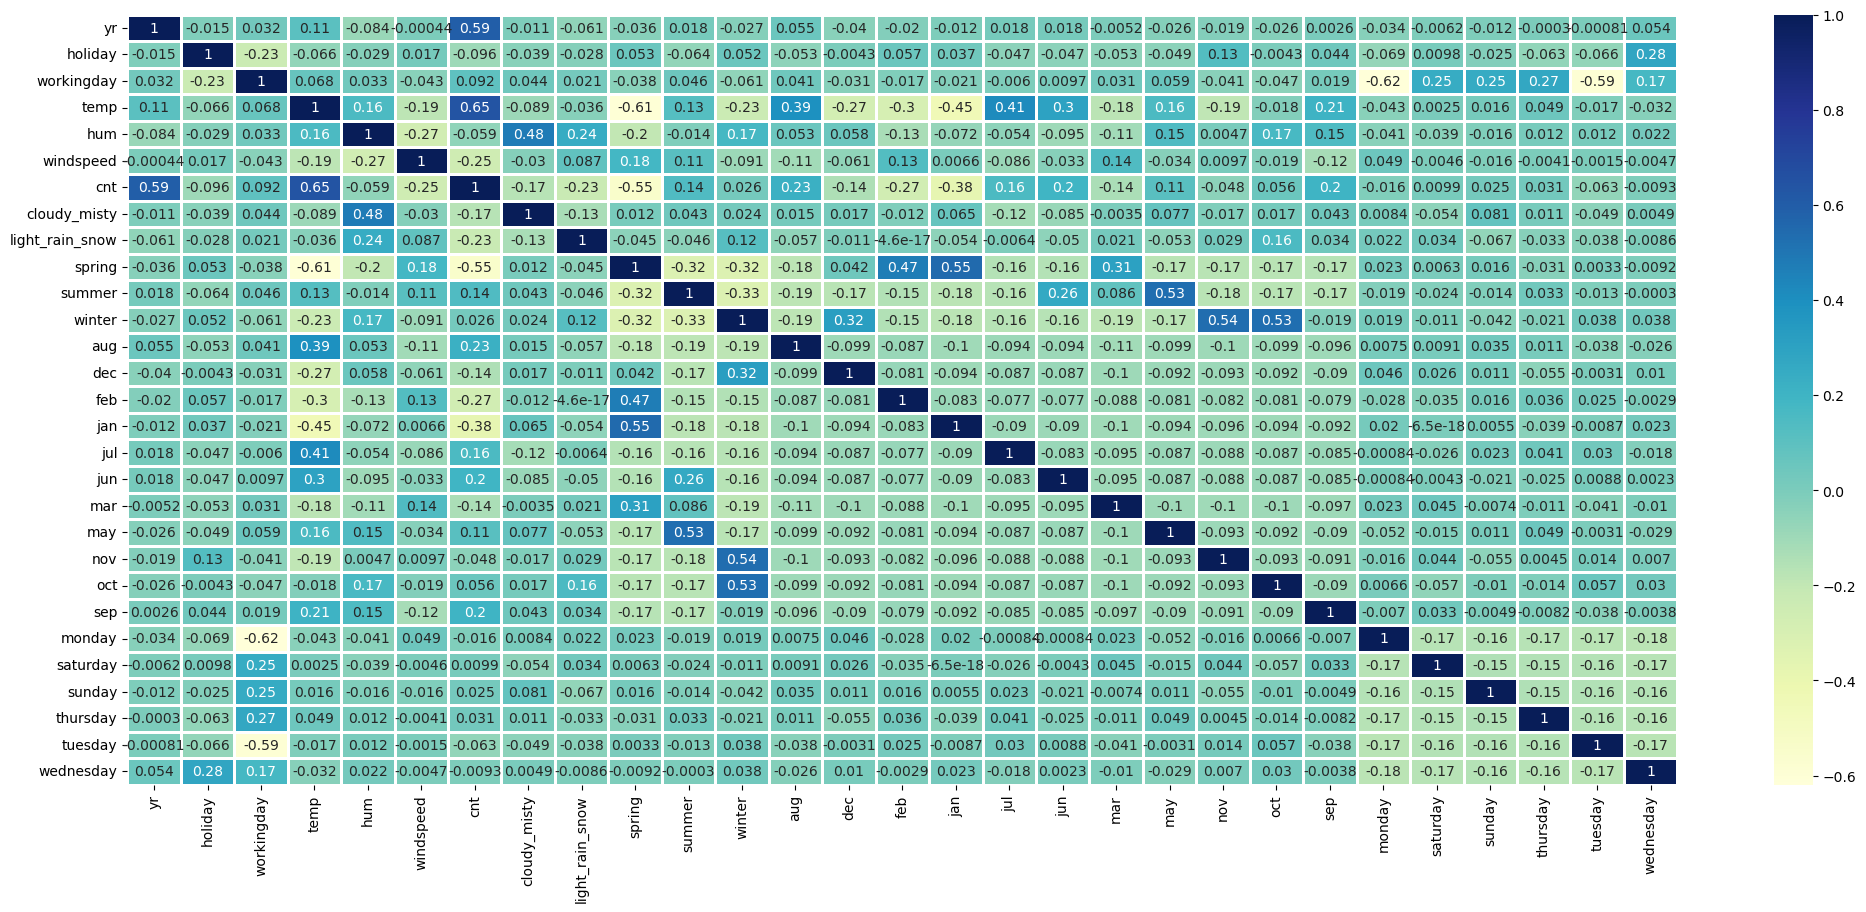

In [194]:
# Checking Correlation Coefficient:
plt.figure(figsize = (25,10))
ax= sns.heatmap(bike_df_train.corr(), annot = True, cmap="YlGnBu",linewidth =1)
plt.show()

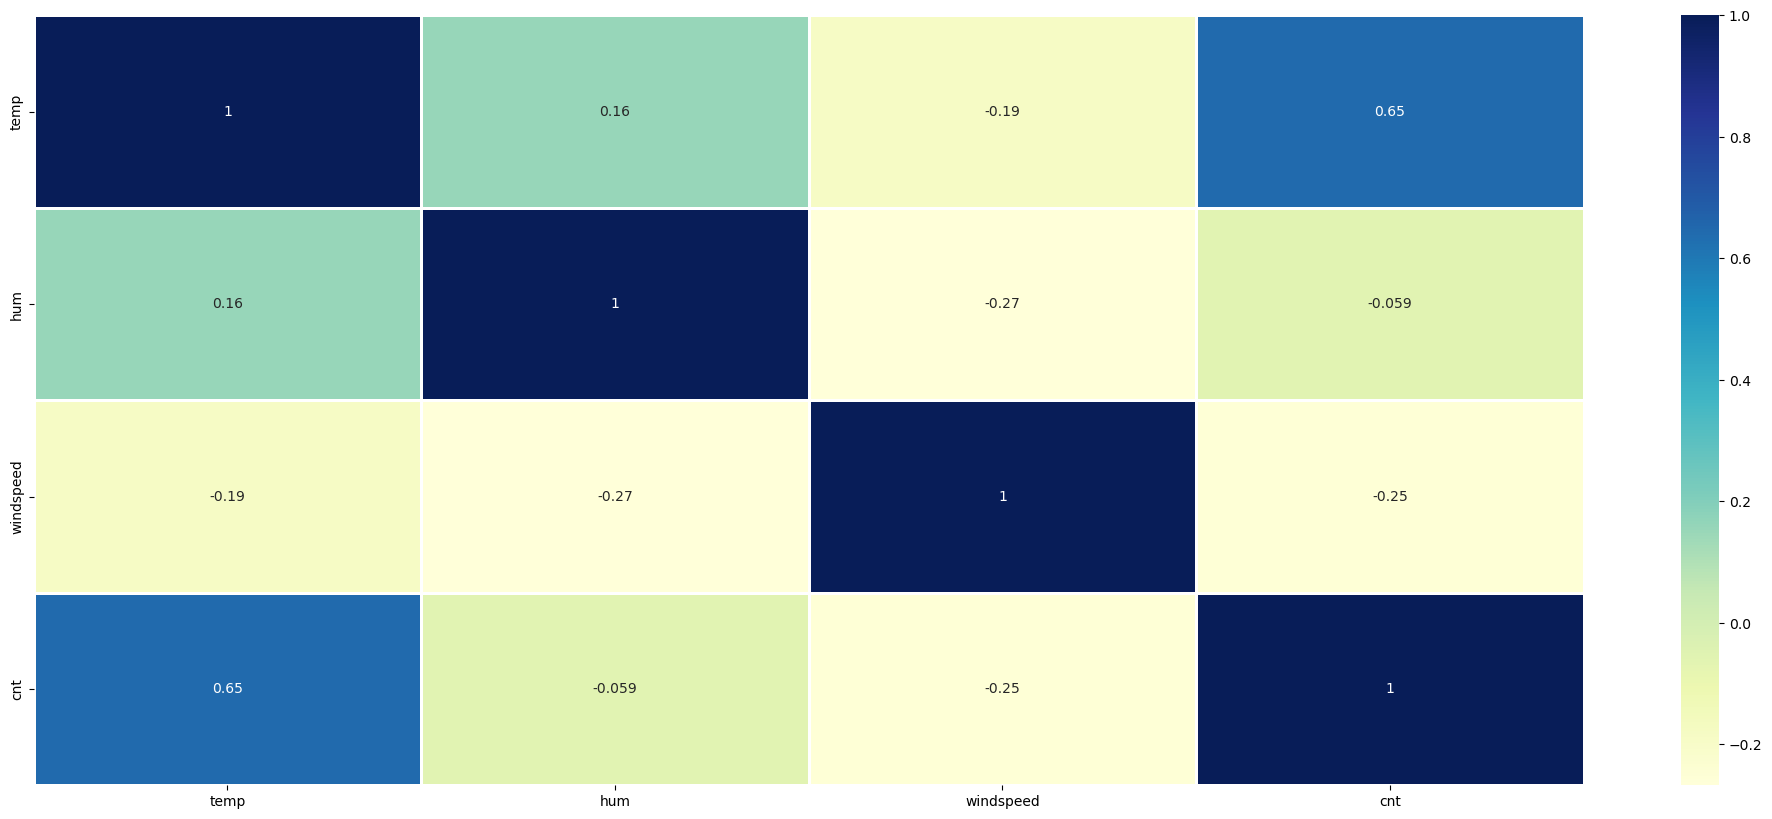

In [195]:
# Checking Correlation Coefficient:
plt.figure(figsize = (25,10))
ax= sns.heatmap(bike_df_train[num_vars].corr(), annot = True, cmap="YlGnBu",linewidth =1)
plt.show()

# Model building and Evaluation:

In [196]:
# Creating X_train,y_train
y_train = bike_df_train.pop('cnt')
X_train = bike_df_train

### REF (Recursive Feature Elimination):

In [197]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [198]:
# Running RFE with the output number of the variable equal to 15.
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=12, step=1)             
rfe = rfe.fit(X_train, y_train)

In [199]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('cloudy_misty', True, 1),
 ('light_rain_snow', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 9),
 ('dec', False, 6),
 ('feb', False, 7),
 ('jan', False, 4),
 ('jul', True, 1),
 ('jun', False, 15),
 ('mar', False, 17),
 ('may', False, 8),
 ('nov', False, 5),
 ('oct', False, 14),
 ('sep', True, 1),
 ('monday', False, 2),
 ('saturday', False, 16),
 ('sunday', False, 13),
 ('thursday', False, 12),
 ('tuesday', False, 10),
 ('wednesday', False, 11)]

In [200]:
# List of 10 variables:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'cloudy_misty',
       'light_rain_snow', 'spring', 'summer', 'winter', 'jul', 'sep'],
      dtype='object')

In [201]:
# List of other columns which have been eleminated:
X_train.columns[~rfe.support_]

Index(['workingday', 'aug', 'dec', 'feb', 'jan', 'jun', 'mar', 'may', 'nov',
       'oct', 'monday', 'saturday', 'sunday', 'thursday', 'tuesday',
       'wednesday'],
      dtype='object')

### Building Model using statsmodel for the detail statistics:

In [202]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Model 1:

In [203]:
# Adding a constant variable 
import statsmodels.api as sm
X_train_new = X_train_rfe
X_train_lm1 = sm.add_constant(X_train_new)

In [204]:
# Running the linear model
lm_1 = sm.OLS(y_train,X_train_lm1).fit()

In [205]:
#Let's see the summary of our first linear model for bike sharing
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          2.95e-190
Time:                        22:29:14   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2848      0.034     

In [206]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.03
2,temp,16.03
4,windspeed,4.65
7,spring,4.01
9,winter,3.33
8,summer,2.79
5,cloudy_misty,2.28
0,yr,2.08
10,jul,1.58
11,sep,1.38


### Model 2:

##### Findings from Model 1:
- R2 : 0.842 and R2- adj : 0.838. All the variables are having pvalue<0.05. Now we will look into VIF which are>5.
- VIF: temp is having VIF (16.03) but during EDA we could see temp has a high correlation with cnt.  
  So we will keep that varible.
- We could found hum as highetst VIF (28.03). We will drop the variable and update the model.

In [207]:
# Dropping the predictor "clear"
X_train_new = X_train_new.drop(["hum"], axis = 1)
# Adding a constant variable  
X_train_lm2 = sm.add_constant(X_train_new)
# Running the linear model
lm_2 = sm.OLS(y_train,X_train_lm2).fit() 
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          5.06e-187
Time:                        22:29:24   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1994      0.030     

In [208]:
# Calculate the VIFs for the new model:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
7,summer,2.23
6,spring,2.08
0,yr,2.07
8,winter,1.78
9,jul,1.58
4,cloudy_misty,1.55
10,sep,1.34
5,light_rain_snow,1.08


### Model 3:

##### Findings from Model 2:
- After dropping the variable "hum" and updating model, we could see R-squared: 0.835 and Adj R-squared : 0.832. 
- All the variables are having pvalue < 0.05. All VIF except temp are also < 5.
- temp is having VIF (5.09) but during EDA we could see temp has a high correlation with cnt.
  So we will keep that varible.
- We could go with model lm_2 but we will try to reduce further independent variable.
- So we will 1st look into the higher pvalue varible and drop it to see the effect on R-squared.
- "jul" is having highest pvalue 0.005. We will drop the variable, update the model and see the any impact in R-squared.

In [209]:
# Dropping the predictor "hum"
X_train_new = X_train_new.drop(["jul"], axis = 1)
# Adding a constant variable  
X_train_lm3 = sm.add_constant(X_train_new)
# Running the linear model
lm_3 = sm.OLS(y_train,X_train_lm3).fit() 
#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          1.47e-186
Time:                        22:29:30   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1909      0.030     

In [210]:
# Calculate the VIFs for the new model:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
6,spring,1.99
7,summer,1.90
8,winter,1.63
4,cloudy_misty,1.55
9,sep,1.23
5,light_rain_snow,1.08
1,holiday,1.04


### Model 4:

##### Findings from Model 3:
- After dropping the variable jul and updating model, we could see R-squared: 0.833 and Adj R-squared : 0.829. There is no    
  significant change in R-squared or adj. R2-squared. So decission to drop the variable is correct.
- All the variables are having pvalue < 0.05. All VIF is also < 5.
- We could go with model lm_3 but we will try to reduce further independent variable.
- So we will 1st look into the higher pvalue varible and drop it to see the effect on R-squared.
- "spring" is having highest pvalue 0.008. We will drop the variable, update the model and see the any impact in R-squared.

In [211]:
# Dropping the predictor "temp"
X_train_new = X_train_new.drop(["spring"], axis = 1)
# Adding a constant variable  
X_train_lm4 = sm.add_constant(X_train_new)
# Running the linear model
lm_4 = sm.OLS(y_train,X_train_lm4).fit() 
#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          2.83e-186
Time:                        22:29:36   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1259      0.017     

In [212]:
# Calculate the VIFs for the new model:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
6,summer,1.57
4,cloudy_misty,1.48
7,winter,1.37
8,sep,1.20
5,light_rain_snow,1.08
1,holiday,1.04


#### Final Model Interpretation:

#### Insights:
- After dropping the variable spring and updating model, 
  we could see R-squared: 0.830 and Adj R-squared : 0.827. 
  There is no significant change in R-squared or adj.
- All the variables are having pvalue alomost zero and all VIF is also < 5.
- There is no significant change in Adj R-squared for lm_3 and lm_4 however we could reduce one independent variable. 
  So we will choose lm_4 as our final model.

In [213]:
# assign final model to lm_final
lm_final = lm_4

# list down and check variables of final model
var_final = list(lm_final.params.index)
var_final.remove('const')
print('Final Selected Variables:', var_final)

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm_final.params,3))

Final Selected Variables: ['yr', 'holiday', 'temp', 'windspeed', 'cloudy_misty', 'light_rain_snow', 'summer', 'winter', 'sep']

Coefficent for the variables are:
const              0.126
yr                 0.233
holiday           -0.099
temp               0.548
windspeed         -0.153
cloudy_misty      -0.078
light_rain_snow   -0.283
summer             0.088
winter             0.129
sep                0.101
dtype: float64


### Model Evaluation on train set:

#### Residual Analysis

In [146]:
# Select final variables from the test dataset
X_train_res = X_train[var_final]

In [147]:
# Adding a constant variable
X_train_res = sm.add_constant(X_train_res)

# Predict train set
y_train_pred = lm_final.predict(X_train_res)

#### Error Terms Analysis: 
- The distribution plot of error term shows the normal distribution with mean at Zero.
- It seems like the corresponding residual plot is reasonably random.
- Also the error terms satisfies to have reasonably constant variance (homoscedasticity)

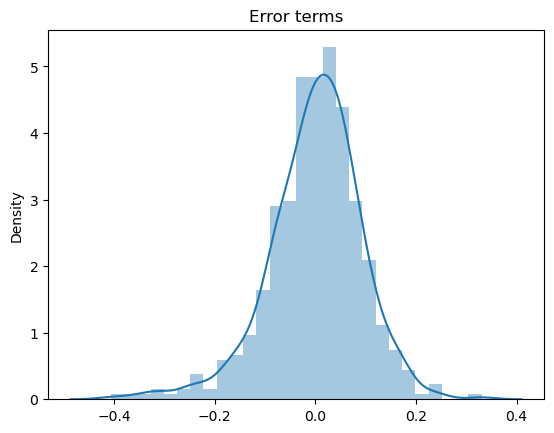

In [148]:
# Distrubition plot for residue
res = y_train - y_train_pred
sns.distplot(res)
plt.title('Error terms')
plt.show()

Text(0, 0.5, 'Residual')

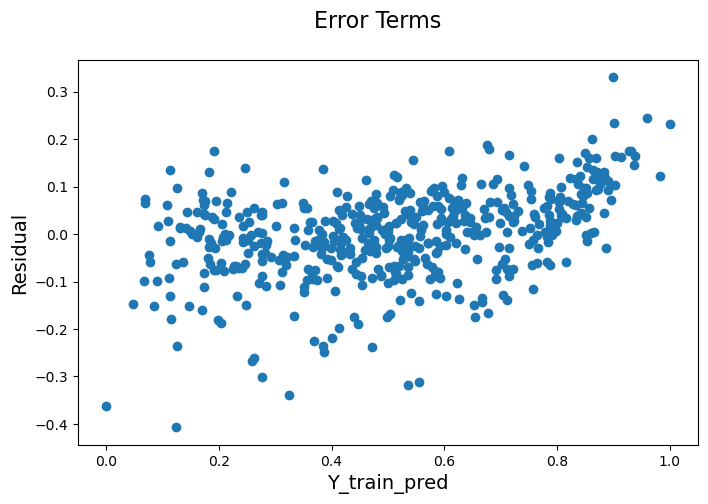

In [149]:
# Error terms train set
c = [i for i in range(1,len(y_train)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_train,res)
fig.suptitle('Error Terms', fontsize=16)              
plt.xlabel('Y_train_pred', fontsize=14)
plt.ylabel('Residual', fontsize=14)

### Prediction on test set:

In [150]:
# Rescalling bike_df_train dataframe:
bike_df_test[num_vars] = scaler.transform(bike_df_test[num_vars])
bike_df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,cloudy_misty,light_rain_snow,spring,...,may,nov,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday
184,0,1,0,0.831783,0.657364,0.084219,0.692706,1,0,0,...,0,0,0,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,1,0,0,...,0,0,1,0,0,1,0,0,0,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [151]:
# Checking test data:
test_final_variable = ['yr','holiday','temp','windspeed','cloudy_misty','light_rain_snow','summer','winter','sep','cnt']
df_test = bike_df_test[test_final_variable]
df_test.head()

,yr,holiday,temp,windspeed,cloudy_misty,light_rain_snow,summer,winter,sep,cnt
184,0,1,0.831783,0.084219,1,0,0,0,0,0.692706
535,1,0,0.901354,0.153728,0,0,1,0,0,0.712034
299,0,0,0.511964,0.334206,1,0,0,1,0,0.303382
221,0,0,0.881625,0.339570,0,0,0,0,0,0.547400
152,0,0,0.817246,0.537414,0,0,1,0,0,0.569029


In [152]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.head()

,yr,holiday,temp,windspeed,cloudy_misty,light_rain_snow,summer,winter,sep
184,0,1,0.831783,0.084219,1,0,0,0,0
535,1,0,0.901354,0.153728,0,0,1,0,0
299,0,0,0.511964,0.334206,1,0,0,1,0
221,0,0,0.881625,0.339570,0,0,0,0,0
152,0,0,0.817246,0.537414,0,0,1,0,0


In [153]:
# add constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,temp,windspeed,cloudy_misty,light_rain_snow,summer,winter,sep
184,1.0,0,1,0.831783,0.084219,1,0,0,0,0
535,1.0,1,0,0.901354,0.153728,0,0,1,0,0
299,1.0,0,0,0.511964,0.334206,1,0,0,1,0
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,0,1,0,0


In [154]:
# predict test dataset
y_test_pred = lm_final.predict(X_test_sm)

In [155]:
# Get R-Squared fro test dataset
r2_test = r2_score(y_true = y_test, y_pred = y_test_pred)
print('R-Squared for Test dataset: ', round(r2_test,3))

R-Squared for Test dataset:  0.794


In [156]:
# Adj. R-Squared for test dataset
N= len(X_test)
p =len(['yr','holiday','temp','windspeed','cloudy_misty','light_rain_snow','summer','winter','sep'])
r2_test_adj = round((1-((1-r2_test)*(N-1)/(N-p-1))),3)
print('Adj. R-Squared for Test dataset: ', round(r2_test_adj,3))

Adj. R-Squared for Test dataset:  0.785


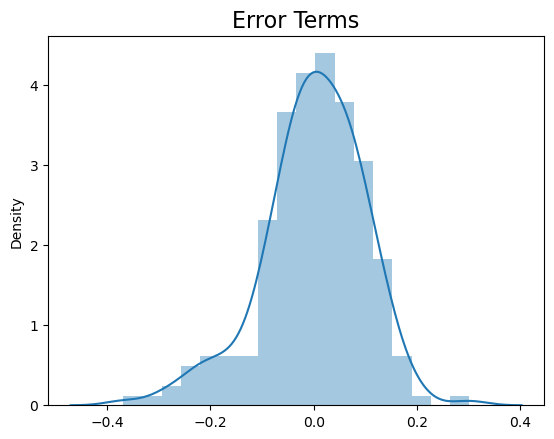

In [157]:
res_test = y_test - y_test_pred
plt.title('Error Terms', fontsize=16) 
sns.distplot(res_test)
plt.show()

Text(0, 0.5, 'Residual')

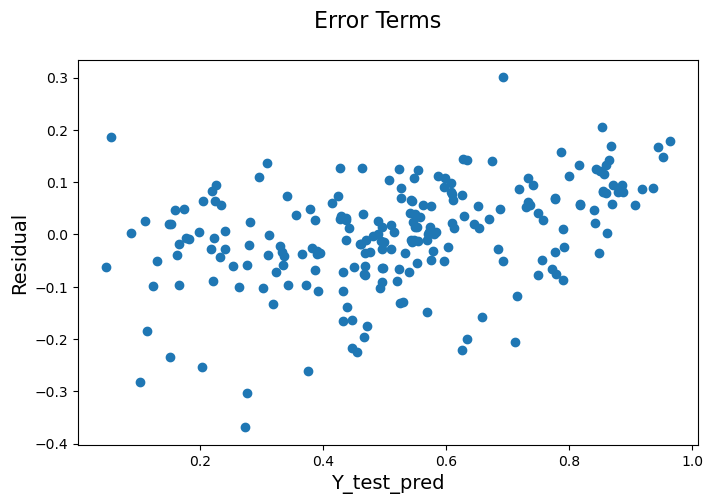

In [215]:
# Error terms
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_test,res_test)
fig.suptitle('Error Terms', fontsize=16)
plt.xlabel('Y_test_pred', fontsize=14)
plt.ylabel('Residual', fontsize=14)   

Text(0, 0.5, 'y_test_pred')

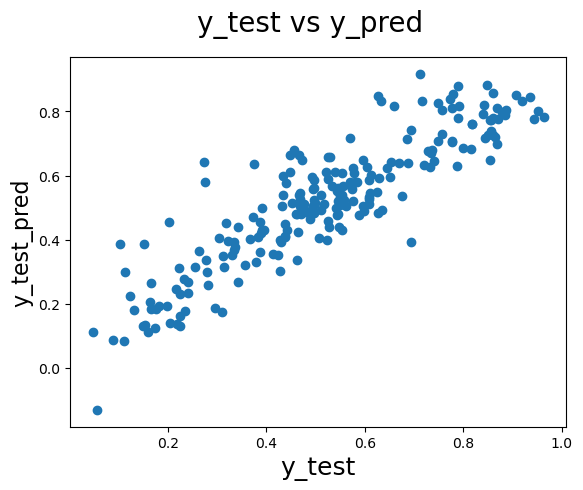

In [159]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16)

### Conclussion:

#### The equation of our best fitted line is:
cnt=0.097+(0.233×yr)+(0.099×holiday)+(0.548×temp)−(0.153×windspeed)+(0.088×summer)+(0.129×winter)+(0.101×sep) 
    −(0.078×cloudy_misty)−(0.283×light_rain_snow)

- From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain almost 80% of bike demand.
- Coeffiencients of the variables explains the factors effecting the bike demand

- Based on final model top three features contributing significantly towards explaining the demand are:
  - Temperature (0.548)
    A coefficient value of ‘0.548’ indicated that a temperature has significant impact on bike rentals
  - weathersit : light_rain_snow (-0.283)
    A coefficient value of ‘-0.283’ indicated that the light rain and snow deters people from renting out bikes
  - year (0.233)
    A coefficient value of ‘0.233’ indicated that year wise bike rental numbers are increasing
    
- It is recommended to give utmost importance to these three variables while planning to achieve maximum bike rental booking.
  As high temperature and good weather positively impacts bike rentals.